In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_user = ("@BBCWorld", "@CBS", "@CNN", "@FoxNews", "@nytimes")

results_list = []
results_list_means =[]

for user in target_user:

    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    for x in range(1, 6):

        public_tweets = api.user_timeline(user, page=x)

        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
                  
    user_results = {
        "Username": user,
        "Compound Scores": compound_list,
        "Postive Scores": positive_list,
        "Neutral Scores": neutral_list,
        "Negative Scores": negative_list,
    }
    
    mean_user_results = {
        "Username": user,
        "Compound Mean Score": np.mean(compound_list),
        "Postive Mean Score": np.mean(positive_list),
        "Neutral Mean Score": np.mean(neutral_list),
        "Negative Mean Score": np.mean(negative_list)
    }

    results_list.append(user_results)
    results_list_means.append(mean_user_results)

    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")

User: @BBCWorld
Compound: -0.216
Positive: 0.040
Neutral: 0.796
Negative: 0.164
User: @CBS
Compound: 0.369
Positive: 0.153
Neutral: 0.832
Negative: 0.015
User: @CNN
Compound: -0.066
Positive: 0.048
Neutral: 0.880
Negative: 0.072
User: @FoxNews
Compound: 0.023
Positive: 0.077
Neutral: 0.851
Negative: 0.073
User: @nytimes
Compound: -0.014
Positive: 0.052
Neutral: 0.893
Negative: 0.055


In [13]:
target_names = ("BBC World", "CBS", "CNN", "Fox News", "NY Times")

tweets_ago= list(np.linspace(1,100,100))

results_data_frame = pd.DataFrame({'Tweets Ago': tweets_ago})

for user in target_names:    
    for x in range(len(target_user)):
        data_frame = pd.DataFrame.from_dict(results_list[x], orient='columns', dtype=None)
        data_frame.rename(columns={'Compound Scores': user + ' Compound Scores',
                                   'Negative Scores': user + ' Negative Scores',
                                   'Neutral Scores': user + ' Neutral Scores',
                                   'Positive Scores': user + ' Positive Scores'
                                  }
                          , inplace=True)
        data_frame.drop('Username', axis=1, inplace=True)
        results_data_frame = pd.concat([results_data_frame,data_frame], axis=1)
        
results_data_frame.set_index(results_data_frame['Tweets Ago'], inplace=True)
results_data_frame

,Tweets Ago,BBC World Compound Scores,BBC World Negative Scores,BBC World Neutral Scores,Postive Scores,BBC World Compound Scores,BBC World Negative Scores,BBC World Neutral Scores,Postive Scores,BBC World Compound Scores,...,NY Times Neutral Scores,Postive Scores,NY Times Compound Scores,NY Times Negative Scores,NY Times Neutral Scores,Postive Scores,NY Times Compound Scores,NY Times Negative Scores,NY Times Neutral Scores,Postive Scores
Tweets Ago,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,0.0000,0.000,1.000,0.000,0.2960,0.000,0.891,0.109,-0.5423,...,0.857,0.000,-0.3818,0.157,0.843,0.000,-0.6808,0.255,0.677,0.068
2.0,2.0,-0.3400,0.103,0.897,0.000,0.6809,0.213,0.449,0.338,-0.7184,...,0.700,0.000,0.5859,0.000,0.780,0.220,0.0000,0.000,1.000,0.000
3.0,3.0,-0.1027,0.190,0.675,0.135,0.5574,0.000,0.805,0.195,0.0000,...,0.786,0.107,0.0000,0.000,1.000,0.000,-0.3400,0.195,0.699,0.107
4.0,4.0,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,-0.3612,...,0.872,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
5.0,5.0,0.0000,0.000,1.000,0.000,0.3612,0.000,0.839,0.161,-0.7579,...,0.711,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
6.0,6.0,-0.7579,0.419,0.581,0.000,0.0000,0.000,1.000,0.000,-0.6858,...,0.771,0.000,-0.2263,0.132,0.868,0.000,0.5859,0.000,0.714,0.286
7.0,7.0,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.1531,...,0.852,0.148,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
8.0,8.0,-0.5719,0.245,0.651,0.103,0.6369,0.000,0.682,0.318,0.4588,...,0.857,0.143,-0.5994,0.394,0.606,0.000,-0.2960,0.155,0.845,0.000
9.0,9.0,0.0000,0.000,1.000,0.000,0.8074,0.000,0.644,0.356,-0.7845,...,0.562,0.109,-0.1511,0.096,0.904,0.000,0.3885,0.000,0.832,0.168


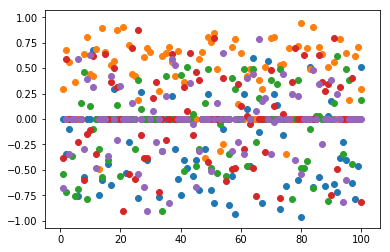

In [14]:
for user in range(len(target_user)): 
    plt.scatter(tweets_ago, results_list[user]['Compound Scores'])